In [1]:
# From Python
# It requires OpenCV installed for Python

import matplotlib.pyplot as plt
import numpy as np

import sys
import cv2
import os
from sys import platform
import argparse
import time

# Import Openpose (Windows/Ubuntu/OSX)
dir_path = os.path.abspath("")
print(dir_path)


/openpose/build/examples/tutorial_api_python


In [2]:
try:
    # Windows Import
    if platform == "win32":
        # Change these variables to point to the correct folder (Release/x64 etc.)
        sys.path.append(dir_path + '/../../python/openpose/Release');
        os.environ['PATH']  = os.environ['PATH'] + ';' + dir_path + '/../../x64/Release;' +  dir_path + '/../../bin;'
        import pyopenpose as op
    else:
        # Change these variables to point to the correct folder (Release/x64 etc.)
        sys.path.append('../../python');
        # If you run `make install` (default path is `/usr/local/python` for Ubuntu), you can also access the OpenPose/python module from there. This will install OpenPose and the python library at your desired installation path. Ensure that this is in your python path in order to use it.
        # sys.path.append('/usr/local/python')
        from openpose import pyopenpose as op
except ImportError as e:
    print('Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?')
    raise e

# Flags
parser = argparse.ArgumentParser()
parser.add_argument("--image_path", default="../../../examples/media/COCO_val2014_000000000241.jpg", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")
# parser.add_argument("--image_path", default="../../../examples/media/baconTest3.jpg", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")
args = parser.parse_known_args()

# Custom Params (refer to include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = "../../../models/"
params["hand"] = True
params["hand_detector"] = 2
params["body"] = 0

# Add others in path?
for i in range(0, len(args[1])):
    curr_item = args[1][i]
    if i != len(args[1])-1: next_item = args[1][i+1]
    else: next_item = "1"
    if "--" in curr_item and "--" in next_item:
        key = curr_item.replace('-','')
        if key not in params:  params[key] = "1"
    elif "--" in curr_item and "--" not in next_item:
        key = curr_item.replace('-','')
        if key not in params: params[key] = next_item

# Construct it from system arguments
# op.init_argv(args[1])
# oppython = op.OpenposePython()

# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

# Read image and face rectangle locations
imageToProcess = cv2.imread(args[0].image_path)
handRectangles = [
    # Left/Right hands person 0
    [
    op.Rectangle(320.035889, 377.675049, 69.300949, 69.300949),
    op.Rectangle(0., 0., 0., 0.),
    ],
    # Left/Right hands person 1
    [
    op.Rectangle(80.155792, 407.673492, 80.812706, 80.812706),
    op.Rectangle(46.449715, 404.559753, 98.898178, 98.898178),
    ],
    # Left/Right hands person 2
    [
    op.Rectangle(185.692673, 303.112244, 157.587555, 157.587555),
    op.Rectangle(88.984360, 268.866547, 117.818230, 117.818230),
    ]
]

# Create new datum
datum = op.Datum()
datum.cvInputData = imageToProcess
# datum.handRectangles = handRectangles



Left hand keypoints: 
3.1607123e-37
Right hand keypoints: 
3.1607267e-37


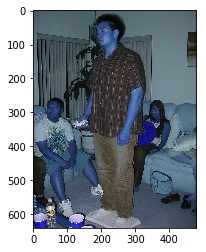

-1

In [3]:
# Process and display image
opWrapper.emplaceAndPop([datum])
print("Left hand keypoints: \n" + str(datum.handKeypoints[0]))
print("Right hand keypoints: \n" + str(datum.handKeypoints[1]))
# cv2.imshow("OpenPose 1.4.0 - Tutorial Python API", datum.cvOutputData)

# w,h,_ = datum.cvOutputData.shape
# print(w/2)
# print(h/2)
# pts1 = np.float32([[0,0],[w,0],[0,h],[w,h]])
# pts2 = np.float32([[0,0],[w*2,0],[0,h*2],[w*2,h*2]])
# matrix = cv2.getPerspectiveTransform(pts1,pts2)
# myimg = cv2.warpPerspective(datum.cvOutputData,matrix,(int(w),int(h)))


plt.imshow(datum.cvOutputData)
plt.show()

cv2.waitKey(0)